In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sc_query import Corpus
from sc_query import QueryWordList
from sc_query import QueryAlternatives
from sc_query import QueryRegex
from sc_query import MarkdownFormater

## 1. Loading suttas from suttacentral github image

Clone the `suttacentral-data` repository.

```bash
git clone https://github.com/suttacentral/suttacentral-data.git
```

Set the `rootdir` variable accordingly.


In [2]:
rootdir = "/home/datayana/suttacentral-data/text/pi/su"

corpus = Corpus()
corpus.load_suttacentral(rootdir)
print("loaded {} files, total bytes {}".format(*corpus.count()))

loaded 5739 files, total bytes 28469442


## 2. Querying a list of simple keywords

Create a query made of just a list of keywords. Function `query_wordlist()` constructs the query by taking a list of keywords.

In [3]:
kwquery = QueryWordList([
            "anussavena", "paramparāya", "itikirāya", "piṭaka­sam­padā­nena",
            "takkahetu", "nayahetu", "ākāra­pari­vitak­kena", "diṭṭhi­nij­jhā­nak­khan­tiyā",
            "bhabbarūpatāya", "samaṇo no garū"        
    ])

results_kwquery = corpus.search(kwquery, sort="score")
print("Results found: {}".format(len(results_kwquery)))

Results found: 20


In [4]:
results_kwquery.get_all_labels('*')


[('diṭṭhinijjhānakkhantiyā', 36),
 ('paramparāya', 26),
 ('ākāraparivitakkena', 23),
 ('takkahetu', 20),
 ('nayahetu', 20),
 ('itikirāya', 19),
 ('anussavena', 17),
 ('piṭakasampadānena', 13),
 ('bhabbarūpatāya', 12),
 ('samaṇo no garū', 12)]

In [5]:
mk = MarkdownFormater()

mk.document_title("Access to knowledge (simple keywords)")
mk.query_details(kwquery)

mk.occurence_table(results_kwquery.get_all_forms(), "Occurence of each keyword")

print(mk.generate())

# Access to knowledge (simple keywords)

## Occurence of each keyword

| occ | expression |
| :-- | :-- |
| 36 | diṭṭhinijjhānakkhantiyā |
| 26 | paramparāya |
| 23 | ākāraparivitakkena |
| 20 | takkahetu |
| 20 | nayahetu |
| 19 | itikirāya |
| 17 | anussavena |
| 13 | piṭakasampadānena |
| 12 | bhabbarūpatāya |
| 12 | samaṇo no garū |




Generate a full markdown and store it on disk...

In [6]:
mk = MarkdownFormater()

mk.document_title("Access to knowledge (simple keywords)")
mk.query_details(kwquery)

mk.occurence_table(results_kwquery.get_all_forms(), "Occurence of each keyword")
mk.results_list(results_kwquery)

mk.generate_and_write("output/test_results-kwlist.md")

## 3. Querying a list of alternatives

If each word can be found in multiple variants, create a list of alternatives.

Here's how to construct the query:

In [7]:
altquery = QueryAlternatives()

altquery.add_alternative("anussavena", ["anussavena", "anussavā", "itihitihaṃ", "itihītihaṃ"])
altquery.add_alternative("paramparāya", ["paramparāya"])
altquery.add_alternative("itikirāya", ["itikirāya", "itikiriyāya"])
altquery.add_alternative("piṭakasampadānena", ["piṭakasampadānena", "piṭakasampadāya"])
altquery.add_alternative("takkahetu", ["takkahetu"])
altquery.add_alternative("nayahetu", ["nayahetu"])
altquery.add_alternative("ākāraparivitakkena", ["ākāraparivitakkena", "ākāraparivitakkā"])
altquery.add_alternative("diṭṭhinijjhānakkhantiyā", ["diṭṭhinijjhānakkhantiyā"])
altquery.add_alternative("bhabbarūpatāya", ["bhabbarūpatāya"])
altquery.add_alternative("samaṇo no garū", ["samaṇo no garū"])

results_altquery = corpus.search(altquery, sort="score")
print("Results found: {}".format(len(results_altquery)))

Results found: 27


In [8]:
results_altquery.get_all_labels('*')

[('anussavena', 53),
 ('ākāraparivitakkena', 39),
 ('diṭṭhinijjhānakkhantiyā', 36),
 ('paramparāya', 26),
 ('piṭakasampadānena', 23),
 ('itikirāya', 20),
 ('takkahetu', 20),
 ('nayahetu', 20),
 ('bhabbarūpatāya', 12),
 ('samaṇo no garū', 12)]

In [9]:
results_altquery.get_all_forms('*')


[('diṭṭhinijjhānakkhantiyā', 36),
 ('paramparāya', 26),
 ('ākāraparivitakkena', 23),
 ('takkahetu', 20),
 ('nayahetu', 20),
 ('itikirāya', 19),
 ('anussavā', 18),
 ('anussavena', 17),
 ('ākāraparivitakkā', 16),
 ('itihītihaṃ', 15),
 ('piṭakasampadānena', 13),
 ('bhabbarūpatāya', 12),
 ('samaṇo no garū', 12),
 ('piṭakasampadāya', 10),
 ('itihitihaṃ', 3),
 ('itikiriyāya', 1)]

In [10]:
mk = MarkdownFormater()

mk.document_title("Access to knowledge (alternatives)")
mk.query_details(altquery)

mk.occurence_table(results_altquery.get_all_labels(), "Occurences of each alternative")
mk.results_list(results_altquery)

mk.generate_and_write("output/test_results-altlist.md")

### 3.1. Showing co-occurences

/home/jeff/local/anaconda2/envs/datayana/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


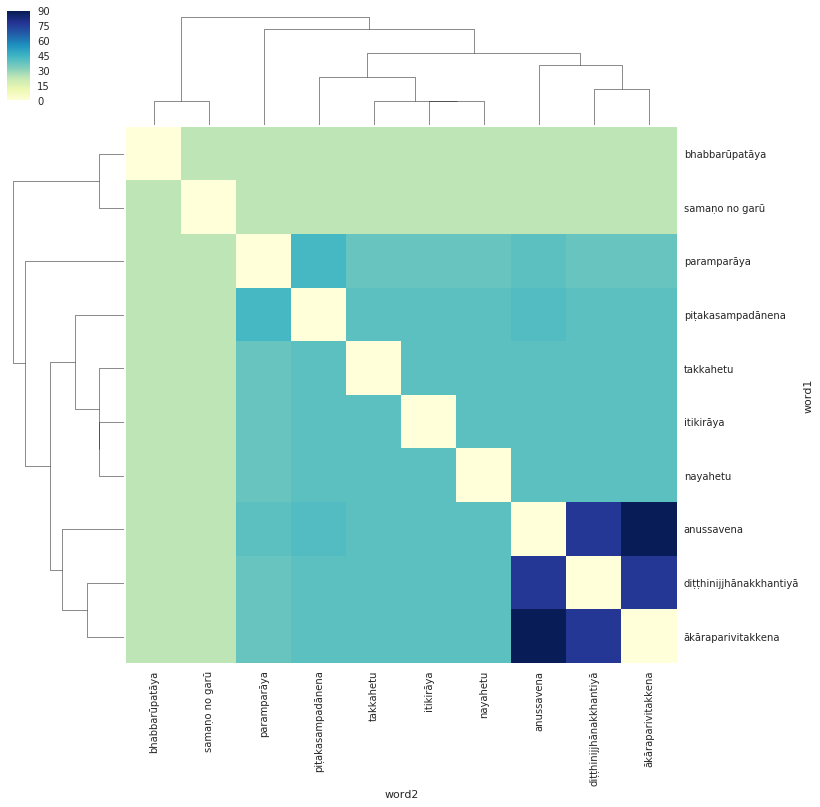

In [11]:
df_pivot = results_altquery.cooccurence_pivot()

rcmd_figsize = (df_pivot.shape[0]+2,df_pivot.shape[1]+2)

sns.set(color_codes=True)

g = sns.clustermap(df_pivot,
                   method="complete", metric="jaccard",
                   cmap="YlGnBu",
                   figsize=rcmd_figsize)

g.savefig("output/img/test_matika_knowledge_cooccurences.png")

In [12]:
mk = MarkdownFormater()

mk.document_title("Access to knowledge (alternatives)")
mk.query_details(altquery)

mk.occurence_table(results_altquery.get_all_labels(), "Occurences of each alternative")
mk.figure("img/test_matika_cooccurences.png")
mk.results_list(results_altquery)

mk.generate_and_write("output/test_results-altlist.md")

## 3.2. Test other examples

In [13]:
altquery = QueryAlternatives()
altquery.add_alternative("dukkha",   ["dukkh"])
altquery.add_alternative("nirodha",  ["nirodh"])
altquery.add_alternative("samudaya", ["samuday"])
altquery.add_alternative("magga",    ["magga"])
altquery.add_alternative("anicca",   ["anicca"])
altquery.add_alternative("anatta",   ["anatta"])
altquery.add_alternative("rupa",     ["rūpa", "rūpā"])
altquery.add_alternative("vedana",   ["vedana", "vedanā"])
altquery.add_alternative("sanna",    ["saññā", "sañña"])
altquery.add_alternative("sankhara", ["sankhārā", "saṅkhāra", "sankhar", "sankhār"])
altquery.add_alternative("vijnana",  ["viññāṇaṃ", "viññāṇ"])

results_altquery = corpus.search(altquery, sort="score")
print("Results found: {}".format(len(results_altquery)))

Results found: 2756


/home/jeff/local/anaconda2/envs/datayana/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


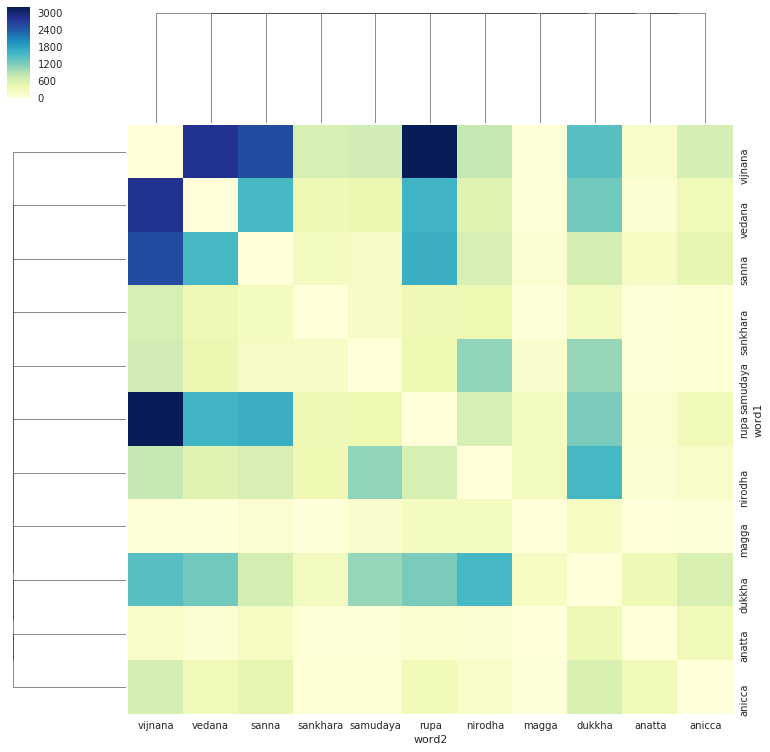

In [14]:
df_pivot = results_altquery.cooccurence_pivot()

rcmd_figsize = (df_pivot.shape[0]+2,df_pivot.shape[1]+2)

sns.set(color_codes=True)

g = sns.clustermap(df_pivot,
                   method="complete", metric="jaccard",
                   cmap="YlGnBu",
                   figsize=rcmd_figsize)

g.savefig("output/img/test_matikas_cooccurences.png")

## 4. Locating the suttas

In [15]:
#location_regex = r"ekaṃ samayaṃ ([^\.\'\"\“\”\‘\’\?]+) (viharati|carati|caramāno|addhānamaggappaṭipanno)([^\.]+)(?:[\.])"
#location_regex = r"ekaṃ samayaṃ (bhagavā|āyasmā ca [^\ ]+ āyasmā ca [^\ ]+ āyasmā ca [^\ ]+|āyasmā ca [^\ ]+ āyasmā ca [^\ ]+|āyasmā ca [^\ ]+|āyasmā [^\ ]+|[^\.\'\"\“\”\‘\’\?]+ bhikkhu) ([^\.\'\"\“\”\‘\’\?]+) (viharanti|viharati|carati|caramāno|addhānamaggappaṭipanno)([^\.]+)(?:[\.])"
#location_regex = r"ekaṃ samayaṃ (bhagavā|āyasmā [^\ ]+|[^\.\'\"\“\”\‘\’\?]+ bhikkh[uū]|[^\ ]+ āyasmā) ([^\.\'\"\“\”\‘\’\?]+) (viharanti|viharati|carati|caramāno)([^\.]+)(?:[\.])"
#location_regex = r"ekaṃ samayaṃ ((bhagavā)|(āyasmā [^\ ]+)|(āyasmā ca [^\ ]+\ ?)+|([^\.\'\"\“\”\‘\’\?]+ bhikkh[uū])) ([^\.\'\"\“\”\‘\’\?]+) (viharanti|viharati|carati|caramāno)([^\.]+)\."
location_query = QueryRegex(
    r"ekaṃ samayaṃ (bhagavā|āyasmā ca [^\ ]+ āyasmā ca [^\ ]+ āyasmā ca [^\ ]+|āyasmā ca [^\ ]+ āyasmā ca [^\ ]+|āyasmā ca [^\ ]+|āyasmā [^\ ]+|[^\.\'\"\“\”\‘\’\?]+ bhikkhu) ([^\.\'\"\“\”\‘\’\?]+) (viharanti|viharati|carati|caramāno|addhānamaggappaṭipanno)([^\.]+)(?:[\.])",
    group_map={0: '*', 1:'name', 2:'location', 4:'rest'}
)

results_location = corpus.search(location_query, sort="score")
print("Results found: {}".format(len(results_location)))


Results found: 782


In [16]:
#location_regex = r"ekaṃ samayaṃ ([^\.\'\"\“\”\‘\’\?]+) (viharati|carati|caramāno|addhānamaggappaṭipanno)([^\.]+)(?:[\.])"
location_query_2 = QueryRegex(
    r"^(sāvatthi)(yaṃ viharati|nidānaṃ).",
    group_map={1:'location'}
)

results_location_2 = corpus.search(location_query_2, sort="score")
print("Results found: {}".format(len(results_location_2)))

results_location.extend(results_location_2)

Results found: 639


In [17]:
mk = MarkdownFormater()
mk.catches_table(results_location.get_all_document_catches(group='location'), "Located suttas")
#print(mk.generate())

In [18]:
selection = results_location.subset("[adms]n[0-9]")
len(selection.get_all_docids())

1309

## 5. "yaṃ kiñci samudayadhammaṃ sabbaṃ taṃ nirodhadhamma"

### 5.1. Literal query

In [19]:
formula_query = QueryWordList([
        "yaṃ kiñci samudayadhammaṃ sabbaṃ taṃ nirodhadhamma"
    ])

results = corpus.search(formula_query, sort="score")
print("Results found: {}".format(len(results)))

print(results.get_all_docids())

Results found: 33
{'mn56', 'dn21', 'mn147', 'mnd14', 'sn35.121', 'an8.22', 'cnd9', 'cnd16', 'sn35.245', 'dn5', 'cnd8', 'mnd15', 'cnd22', 'cnd23', 'mnd4', 'ud5.3', 'mnd16', 'mil2', 'mnd13', 'mnd11', 'an8.12', 'mn74', 'dn3', 'an8.21', 'cnd12', 'dn14', 'sn35.74', 'cnd20', 'cnd6', 'cnd5', 'mn91', 'sn56.11', 'mnd10'}


In [20]:
mk = MarkdownFormater()

mk.document_title("Yaṃ kiñci samudayadhammaṃ sabbaṃ taṃ nirodhadhamma (literal)")
mk.query_details(formula_query)

mk.catches_table(results.get_all_document_catches(group='*'), "Occurences of each form")
mk.results_list(results)

mk.generate_and_write("output/test_yam-kinci-v1.md")

### 5.2. yaṃ kiñci [...] sabbaṃ taṃ [...]"

In [21]:
#formula_reg = r"(ya|yā|ye)([^\.\'\"\“\”\‘\’\?]+)(kiñci|kāci|keci)([^\.\'\"\“\”\‘\’\?]+)sabbaṃ([^\:\.\'\"\“\”\‘\’\?]+)[\:\.\'\"\“\”\‘\’\?]"
#formula_reg = r"((ya|yā|ye)([^\.\'\"\“\”\‘\’\?\;]+)(kiñci|kāci|keci)([^\.\'\"\“\”\‘\’\?]+)sabb[aā]([^\:\.\'\"\“\”\‘\’\?]+))(?:[\:\.\'\"\“\”\‘\’\?])"
#formula_reg = r"((ya|yā|ye)([^\.\'\"\“\”\‘\’\?\;]+)(ki[ñnñ]ci|kāci|keci)([^\.\'\"\“\”\‘\’\?]+)(sabb[aā] |taṃ )([^\:\.\'\"\“\”\‘\’\?]+))(?:[\:\.\'\"\“\”\‘\’\?])"

yam_kinci_query = QueryRegex(
    r"((ya|yā|ye)([^\.\'\"\“\”\‘\’\?\;]+)(ki[ñnñ]ci|kāci|keci)([^\.\'\"\“\”\‘\’\?]+)(sabb[aā] |taṃ )([^\:\.\'\"\“\”\‘\’\?]+))(?:[\:\.\'\"\“\”\‘\’\?])",
    group_map={1: '*'}
)

results = corpus.search(yam_kinci_query)
print("Results found: {}".format(len(results)))
print(results.get_all_docids())

mk = MarkdownFormater()

mk.document_title("Yaṃ kiñci ... sabbaṃ taṃ ... (regex)")
mk.query_details(formula_query)

mk.catches_table(results.get_all_document_catches(group='*'), "Occurences of each form")
mk.results_list(results)

mk.generate_and_write("output/test_yam-kinci-regex-v2.md")

Results found: 227
{'mnd14', 'dn1', 'mn22', 'dn10', 'ps2.6', 'mil6.4.2', 'an4.196', 'sn45.122', 'sn3.5', 'sn48.34', 'sn35.121', 'sn22.124', 'dn18', 'mil6.3.1', 'sn45.96', 'sn22.82', 'dn5', 'sn22.107', 'dn9', 'sn20.1', 'sn22.59', 'mn102', 'mil5.1.2', 'sn48.6', 'an4.8', 'cnd7', 'pe2', 'ne37', 'cnd23', 'mil6.1.4', 'mn119', 'sn22.47', 'ne13', 'ud5.3', 'iti72', 'mil2', 'thi-ap29', 'mnd13', 'mil5.1.6', 'sn51.6', 'sn14.37', 'mn75', 'sn45.110', 'mn28', 'an10.95', 'an5.121', 'an8.8', 'dn3', 'sn45.141', 'sn14.38', 'dn14', 'snp2.12', 'mil6.4.1', 'snp5.4', 'ja506', 'mil3.1.14', 'mn39', 'ps3.11', 'cnd5', 'sn56.5', 'sn17.27', 'snp4.4', 'mil3.7.14', 'sn3.4', 'sn45.104', 'mn56', 'mn147', 'an10.15', 'sn41.10', 'mn66', 'mil5.1.1', 'sn18.21', 'sn35.245', 'thag16.1', 'sn23.6', 'sn17.25', 'cnd22', 'ps3.10', 'mn52', 'sn12.66', 'ja535', 'an11.16', 'an5.100', 'ps3.2', 'sn2.8', 'sn42.11', 'sn7.18', 'sn22.48', 'ja511', 'ja522', 'ja519', 'mil5.2.5', 'dhp', 'mn34', 'cnd12', 'sn56.24', 'snp4.13', 'sn16.11', 'pe8',

### 5.3. [...] samudayadhammaṃ [...] nirodhadhamma

In [22]:
yam_kinci_query = QueryRegex(
    #r"([^\:\.\'\"\“\”\‘\’\?]+samudayadhamma([^\:\.\'\"\“\”\‘\’\?]+)nirodhadhamma([^\:\.\'\"\“\”\‘\’\?]+))([\:\.\'\"\“\”\‘\’\?])",
    r"([^\:\.\'\"\“\”\‘\’\?]*samuda[^\:\.\'\"\“\”\‘\’\?]*dhamma[^\:\.\'\"\“\”\‘\’\?]*nirodh[^\:\.\'\"\“\”\‘\’\?]*dhamma[^\ \:\.\'\"\“\”\‘\’\?]*)",
    group_map={1: '*'}
)

results = corpus.search(yam_kinci_query)
print("Results found: {}".format(len(results)))
print(results.get_all_docids())

mk = MarkdownFormater()

mk.document_title("[...] samudayadhammaṃ [...] nirodhadhamma (regex)")
mk.query_details(formula_query)

mk.catches_table(results.get_all_document_catches(
                    group='*',
                    postprocess=lambda x : x.strip().replace(",","")
                 ))

mk.results_list(results)

mk.generate_and_write("output/test_yam-kinci-regex-v3.md")

Results found: 36
{'mn56', 'dn21', 'mn147', 'mnd14', 'ps2.6', 'sn35.121', 'an8.22', 'cnd9', 'cnd16', 'sn35.245', 'dn5', 'cnd8', 'mnd15', 'cnd22', 'cnd23', 'mnd4', 'ud5.3', 'mil2', 'mnd16', 'mnd13', 'mnd11', 'an8.12', 'mn74', 'dn3', 'an8.21', 'cnd12', 'sn56.11', 'dn14', 'sn35.74', 'cnd20', 'cnd6', 'cnd5', 'mn91', 'mnd9', 'mnd10', 'cnd14'}
